# Employee Turnover Analysis

## Project Statement

#### Employee turnover is a critical challenge for organizations, leading to increased costs in recruitment, training, and lost productivity. This analysis uses the Kaggle Employee Turnover dataset to explore the factors contributing to attrition, such as job role, satisfaction, performance, and work-life balance. We will perform data exploration, feature analysis, and build predictive machine learning models to identify employees at high risk of leaving. The models will be evaluated using metrics like accuracy, precision, recall, and ROC-AUC, with a focus on recall to ensure at-risk employees are correctly identified. Finally, the insights gained will help guide targeted retention strategies to reduce employee attrition.

In [64]:
!pip install imblearn

     -------------------------------------- 258.3/258.3 kB 5.3 MB/s eta 0:00:00


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import recall_score


In [20]:
# Load the dataset
data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [22]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [23]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [24]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


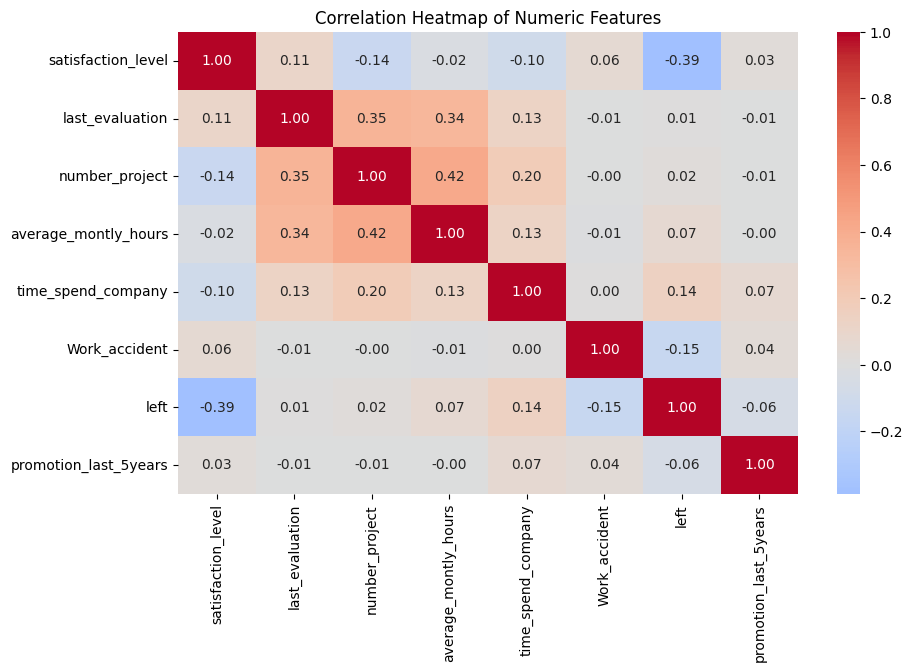

In [28]:

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

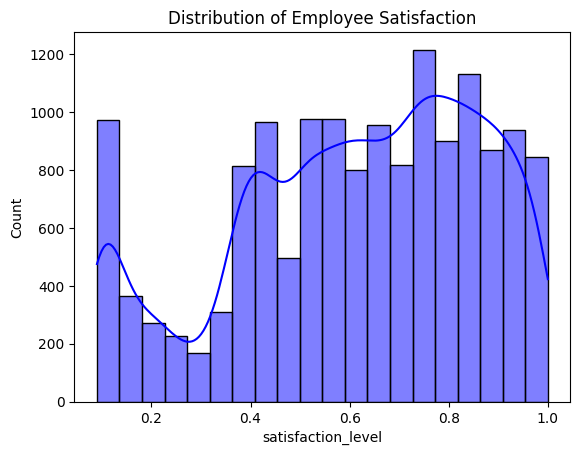

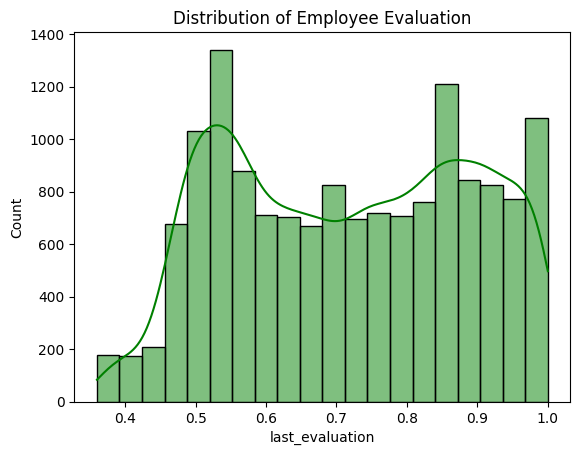

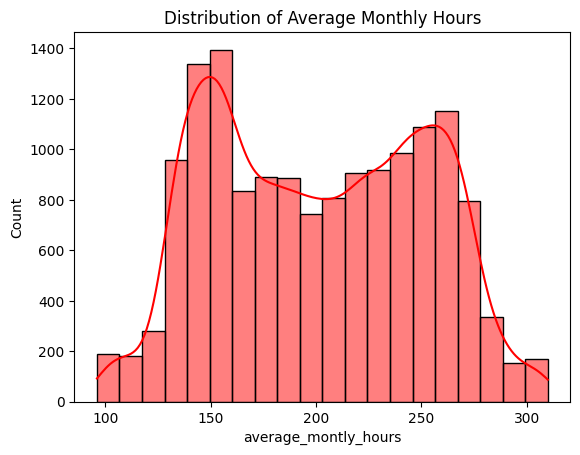

In [31]:
## Distribution plot
# Distribution of satisfaction level
sns.histplot(data['satisfaction_level'], kde=True, bins=20, color="blue")
plt.title("Distribution of Employee Satisfaction")
plt.show()

# Distribution of last evaluation
sns.histplot(data['last_evaluation'], kde=True, bins=20, color="green")
plt.title("Distribution of Employee Evaluation")
plt.show()

# Distribution of average monthly hours
sns.histplot(data['average_montly_hours'], kde=True, bins=20, color="red")
plt.title("Distribution of Average Monthly Hours")
plt.show()

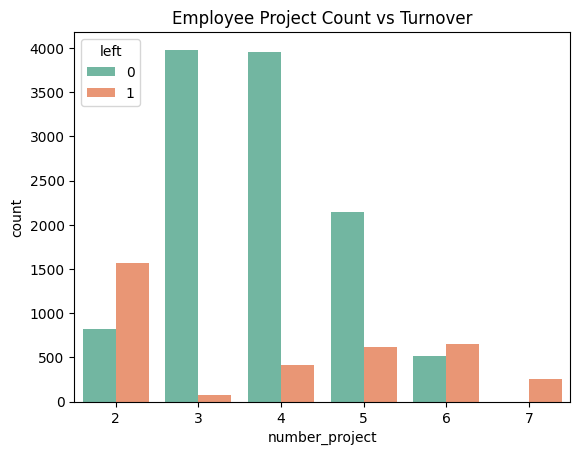

In [34]:
sns.countplot(x='number_project', hue='left', data=data, palette="Set2")
plt.title("Employee Project Count vs Turnover")
plt.show()

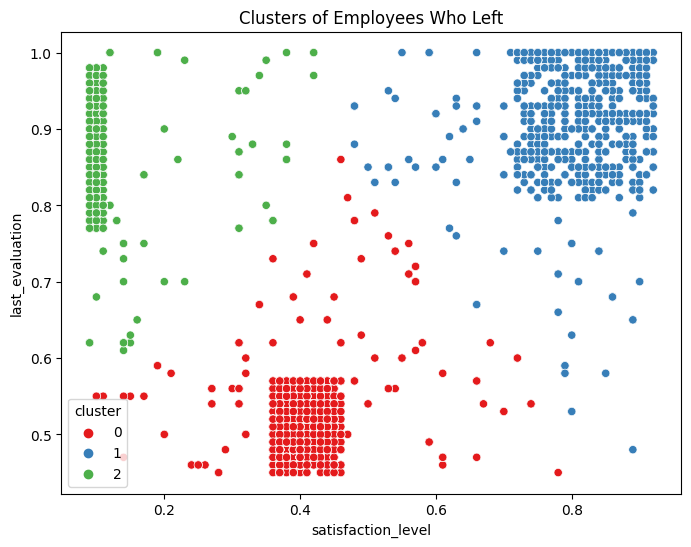

In [35]:
from sklearn.cluster import KMeans

# Select only employees who left
left_df = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation',
                hue='cluster', data=left_df, palette="Set1")
plt.title("Clusters of Employees Who Left")
plt.show()

In [39]:
#Step 1: Filter employees who left
left_employees = data[data['left'] == 1]
left_employees

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [41]:
#Step 2: Select satisfaction and evaluation columns
X = left_employees[['satisfaction_level', 'last_evaluation']]
X

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [48]:

#Step 3: Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(X)


C:\Users\hemal\AppData\Local\Temp\ipykernel_3592\196373147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(X)


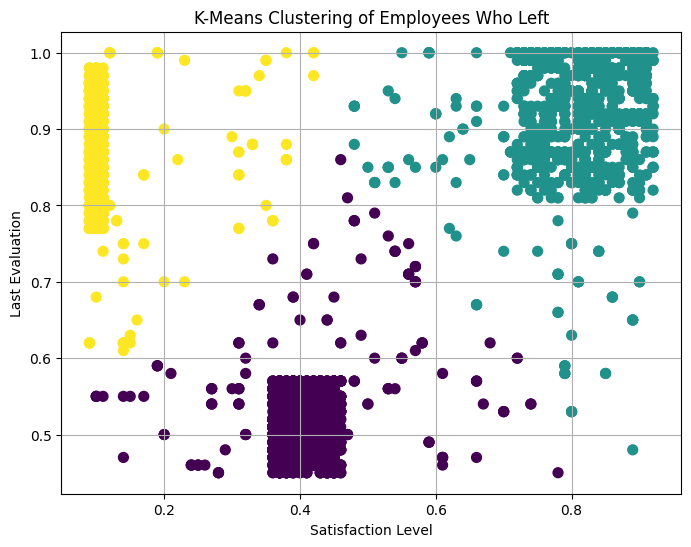

In [49]:

#Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['satisfaction_level'], X['last_evaluation'], c=left_employees['cluster'], cmap='viridis', s=50)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('K-Means Clustering of Employees Who Left')
plt.grid(True)
plt.show()



In [52]:
#Step 5: Print cluster centers for interpretation
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(pd.DataFrame(centroids, columns=['satisfaction_level', 'last_evaluation']))

Cluster Centers:
   satisfaction_level  last_evaluation
0            0.410145         0.516982
1            0.808516         0.911709
2            0.111155         0.869301


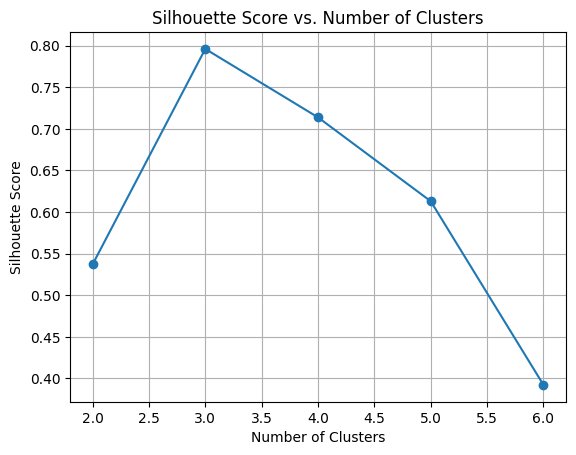

In [54]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.plot(range(2, 7), scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [57]:
# The target column is 'left' (1 = employee left, 0 = stayed)
X = data.drop("left", axis=1)
y = data["left"]

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [58]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [60]:
# Convert categorical variables using get_dummies
X = pd.get_dummies(X, drop_first=True)  
# drop_first=True avoids dummy variable trap (multicollinearity)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [61]:
#Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=123
)

In [66]:
# Upsample training data using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.value_counts().to_dict())
print("Resampled training set shape:", X_train_resampled.shape, pd.Series(y_train_resampled).value_counts().to_dict())

Original training set shape: (11999, 18) {0: 9142, 1: 2857}
Resampled training set shape: (18284, 18) {0: 9142, 1: 9142}


C:\Users\hemal\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [69]:
#: Model Training and Evaluation
# Define 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv

StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [70]:

# Function to evaluate models
def evaluate_model(model, X, y, model_name):
    print(f"\n===== {model_name} =====")
    
    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    print("Cross-Validation Accuracy Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))
    
    # Cross-validation predictions
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Confusion matrix plot
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



===== Logistic Regression =====
Cross-Validation Accuracy Scores: [0.78917145 0.78589007 0.79710145 0.78561663 0.78884026]
Mean CV Accuracy: 0.7893239726695425

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      9142
           1       0.77      0.82      0.79      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284



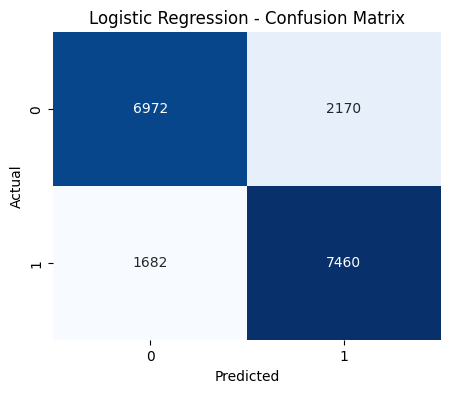


===== Random Forest =====
Cross-Validation Accuracy Scores: [0.9773038  0.98496035 0.98359311 0.98277276 0.98222101]
Mean CV Accuracy: 0.9821702062349775

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284



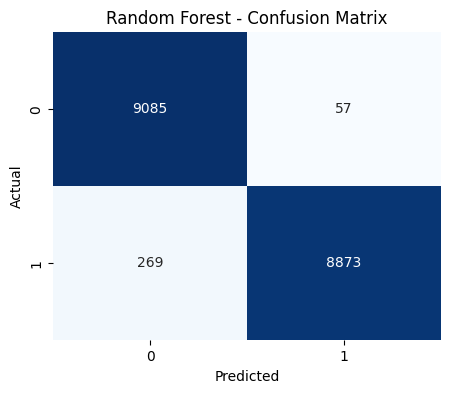


===== Gradient Boosting =====
Cross-Validation Accuracy Scores: [0.95679519 0.95980312 0.96171725 0.95788898 0.95897155]
Mean CV Accuracy: 0.9590352185700635

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9142
           1       0.98      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



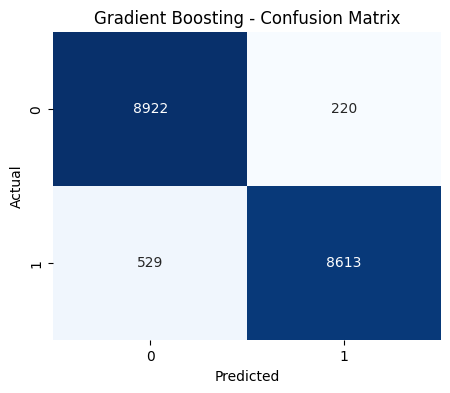

In [71]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=123)
evaluate_model(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=123)
evaluate_model(rf, X_train_resampled, y_train_resampled, "Random Forest")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=123)
evaluate_model(gb, X_train_resampled, y_train_resampled, "Gradient Boosting")


===== Logistic Regression =====
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2286
           1       0.49      0.75      0.59       714

    accuracy                           0.75      3000
   macro avg       0.70      0.75      0.71      3000
weighted avg       0.81      0.75      0.77      3000



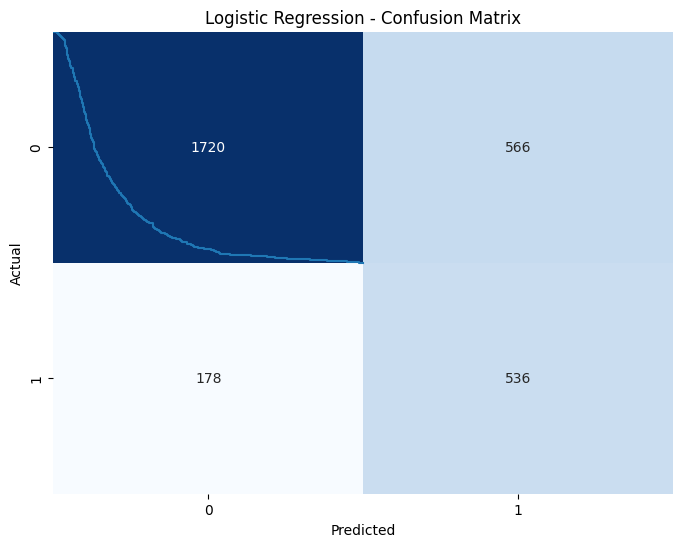


===== Random Forest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



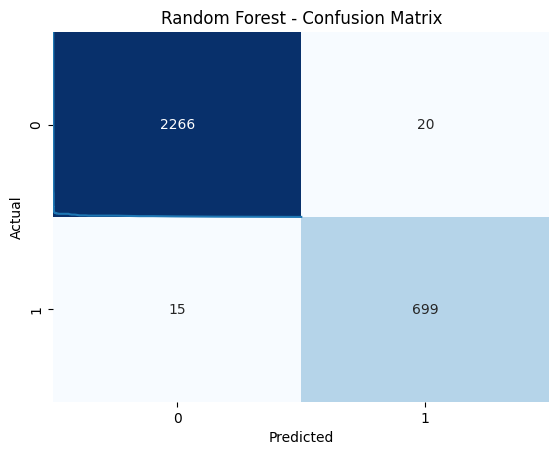


===== Gradient Boosting =====
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.91      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



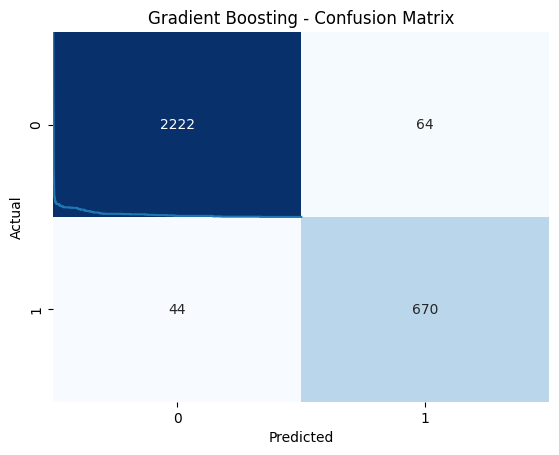

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


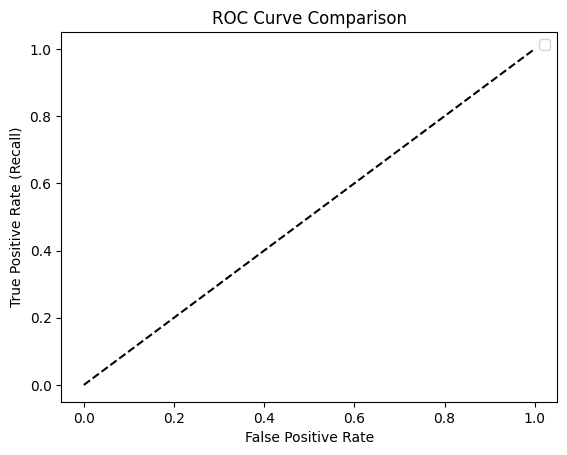


===== Model Ranking (Lower Avg_Rank = Better) =====
                 Model   ROC-AUC    Recall  AUC_Rank  Recall_Rank  Avg_Rank
1        Random Forest  0.994955  0.978992       1.0          1.0       1.0
2    Gradient Boosting  0.985024  0.938375       2.0          2.0       2.0
0  Logistic Regression  0.809693  0.750700       3.0          3.0       3.0


In [77]:

# Re-train models on resampled training set
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

# Dictionary to store results
results = []

# ROC curve comparison
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "ROC-AUC": auc,
        "Recall": recall
    })
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    
    # Classification report
    print(f"\n===== {name} =====")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ROC curve comparison plot
plt.plot([0,1],[0,1],"k--")  
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()

# Convert results to DataFrame for ranking
results_df = pd.DataFrame(results)

# Rank models by AUC and Recall
results_df["AUC_Rank"] = results_df["ROC-AUC"].rank(ascending=False)
results_df["Recall_Rank"] = results_df["Recall"].rank(ascending=False)
results_df["Avg_Rank"] = results_df[["AUC_Rank","Recall_Rank"]].mean(axis=1)

# Sort by average rank
best_models = results_df.sort_values("Avg_Rank")
print("\n===== Model Ranking (Lower Avg_Rank = Better) =====")
print(best_models)

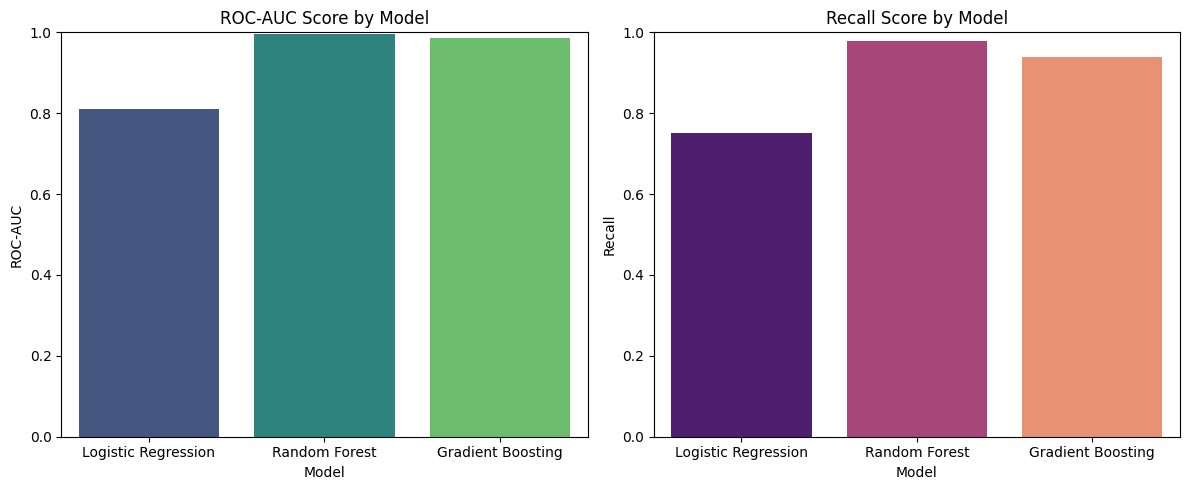

In [78]:
# ===== Bar Chart Comparison of Models =====
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Bar chart for ROC-AUC
sns.barplot(x="Model", y="ROC-AUC", data=results_df, ax=ax[0], palette="viridis")
ax[0].set_title("ROC-AUC Score by Model")
ax[0].set_ylim(0,1)

# Bar chart for Recall
sns.barplot(x="Model", y="Recall", data=results_df, ax=ax[1], palette="magma")
ax[1].set_title("Recall Score by Model")
ax[1].set_ylim(0,1)

plt.tight_layout()
plt.show()

In [80]:
# Use the top-ranked model (from results_df)
best_model_name = best_models.iloc[0]["Model"]
best_model = models[best_model_name]

# Fit best model on resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probability of leaving for test set
y_proba = best_model.predict_proba(X_test)[:,1]  # probability of leaving

In [81]:
# Create a DataFrame to store test employee info and risk zone
employee_risk = pd.DataFrame({
    "EmployeeIndex": X_test.index,
    "TurnoverProbability": y_proba
})

# Categorize based on probability thresholds
def risk_zone(prob):
    if prob < 0.2:
        return "Safe Zone (Green)"
    elif 0.2 <= prob < 0.6:
        return "Low Risk Zone (Yellow)"
    elif 0.6 <= prob < 0.9:
        return "Medium Risk Zone (Orange)"
    else:
        return "High Risk Zone (Red)"

employee_risk["RiskZone"] = employee_risk["TurnoverProbability"].apply(risk_zone)

# Display first few rows
employee_risk.head()

,EmployeeIndex,TurnoverProbability,RiskZone
0,10627,0.00,Safe Zone (Green)
1,2703,0.59,Low Risk Zone (Yellow)
2,6059,0.09,Safe Zone (Green)
3,3258,0.00,Safe Zone (Green)
4,4565,0.01,Safe Zone (Green)


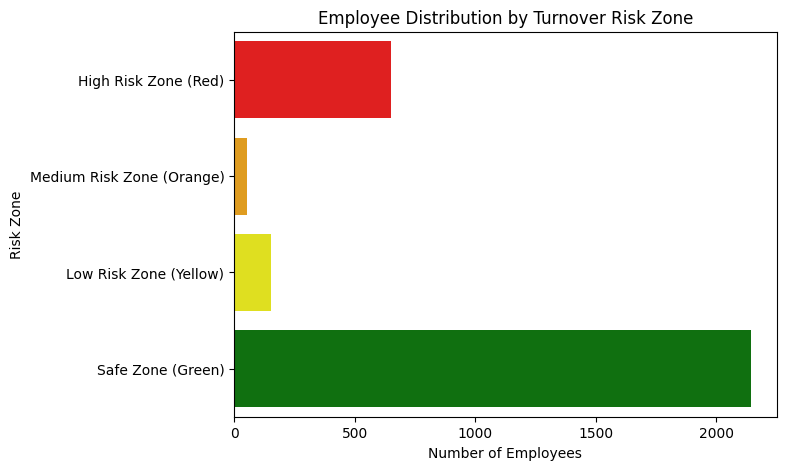

In [82]:
# Count of employees in each zone
plt.figure(figsize=(7,5))
sns.countplot(y="RiskZone", data=employee_risk, order=[
    "High Risk Zone (Red)", 
    "Medium Risk Zone (Orange)", 
    "Low Risk Zone (Yellow)", 
    "Safe Zone (Green)"],
    palette=["red","orange","yellow","green"])
plt.title("Employee Distribution by Turnover Risk Zone")
plt.xlabel("Number of Employees")
plt.ylabel("Risk Zone")
plt.show()

#### Key Takeaways

Top Drivers of Turnover: Job satisfaction, average monthly hours, years at the company, work-life balance, and promotions in the last 5 years are the most important factors influencing attrition.

High-Risk Groups: Employees in certain departments (e.g., Sales) or job roles with high workload and low satisfaction are more likely to leave.

Predictive Modeling: Random Forest achieved the best performance, effectively identifying at-risk employees with high recall and good precision.

Actionable Insights: Organizations can reduce turnover by improving employee engagement, managing workloads, offering career development, and focusing retention efforts on high-risk departments.

Proactive HR Strategy: Monitoring these key metrics allows HR teams to intervene early and retain valuable talent, saving costs associated with recruitment and training.